# Exploratory Data Analysis
## Group 27
### January 2022

With your datasets sourced and cleaned now you will begin exploring the data. This entails performing Exploratory Data Analysis (EDA). EDA is used to understand and summarize the contents of a dataset. In this case, EDA will be used to help you investigate the specific questions for the business problem proposed for your capstone project. EDA relies heavily on visualizing the data to assess patterns and identify data characteristics. Please use the **Six Steps of Exploratory Data Analysis** outlined below to help guide your work. Refer back to your project scoping document where you have outlined the specific business problems you are looking to solve.

Selecting columns of interest and target feature(s)
* Which columns in your data sets will help you answer the questions posed by
your problem statement? 
* Which columns represent the key pieces of information you want to examine (i.e.
your target variables)?
* How many numerical, textual, datetime etc. columns are in your dataset?
* Pick out any similar columns among your disparate data sets for potential linking
later on on the EDA process

Explore Individual columns for preliminary insights
* How many null values are present in your data (what percentage)?
* Plot one-dimensional distributions of numerical columns (ex. histograms) and
observe the overall shape of the data (i.e. normal distribution, skewed,
multimodal, discontinuous
* Compute basic statistics of numerical columns
* Calculate subgroup size of text/categorical data (such as the pd.value_counts()
method)
* Explore any date/datetime columns for basic trends. How long is the period of
time covered by the dataset? Do any seasonality trends immediately become
apparent?

 Plot two-dimensional distributions of your variables of interest against your target
variable(s).
* Across different values of your independent variable, how does the dependent
variable change?
* Which interactions of variables provide the most interesting insights?
* What trends do you see in the data? Do they support or contradict the hypothesis
of your problem statement?

Analyze any correlations between your independent and dependent variables
* Understand and resolve surprising correlations between these variables, and use this information to validate your initial hypothesis.

Craft a compelling story from the work you’ve done in the previous steps
* Which charts, graphs, and tables provide the most compelling evidence in
support of your project idea?
* If your data analysis has largely disproved your initial hypothesis, can you craft a
narrative for this alternative?


In [3]:
# Packages
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import base64

#### Reading Datasets

In [6]:
# Read CPS
cps_path = '../../datasets/Mississipi/'
# cps_path = '/home/jovyan/' # Uncomment for Drea
cps_csvfile = 'CPS_2019Data_MS.csv'
cps_df = pd.read_csv(cps_path + cps_csvfile)

## CPS First exploration

In [7]:
cps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  2692 non-null   int64
 1   HEFAMINC    2692 non-null   int64
 2   HRHTYPE     2692 non-null   int64
 3   PTDTRACE    2692 non-null   int64
 4   PREMPNOT    2692 non-null   int64
 5   PRCHLD      2692 non-null   int64
 6   HETS2O      2692 non-null   int64
 7   HETS6O      2692 non-null   int64
 8   HETS8CO     2692 non-null   int64
 9   HESP1       2692 non-null   int64
 10  HETSP3O     2692 non-null   int64
dtypes: int64(11)
memory usage: 231.5 KB


In [8]:
cps_df.head()

,Unnamed: 0,HEFAMINC,HRHTYPE,PTDTRACE,PREMPNOT,PRCHLD,HETS2O,HETS6O,HETS8CO,HESP1,HETSP3O
0,2292,8,1,1,1,4,-1,-1,-1,-1,-1
1,2293,8,1,1,4,4,-1,-1,-1,-1,-1
2,2294,8,1,1,4,0,-1,-1,-1,-1,-1
3,2295,8,1,1,-1,0,-1,-1,-1,-1,-1
4,2296,10,7,1,4,0,-1,30,20,-1,-1


In [9]:
# Creating a list of 10 columns that we are going to keep
cps_df = cps_df.rename(columns={'HEFAMIC':'FAMILY_INCOME','HRHTYPE':'HOUSEHOLD_TYPE', 
                        'PTDTRACE':'RACE', 'PREMPNOT':'EMPLOYMENT_STATUS', 
                        'PRCHILD':'PRESENCE_OF_CHILDREN_<18YO', 'HETS20':'HOUSEHOLD_PURCHASES_GROCERIES', 
                        'HETS60':'HOUSEHOLD_PURCHASES_RESTAURANTS', 
                        'HETS8CO': 'AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED', 
                        'HETSP30':'FOODSTAMPS_AMT_PERMONTH', 'HESP1':'Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS'})

In [10]:
cps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 11 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Unnamed: 0                                 2692 non-null   int64
 1   HEFAMINC                                   2692 non-null   int64
 2   HOUSEHOLD_TYPE                             2692 non-null   int64
 3   RACE                                       2692 non-null   int64
 4   EMPLOYMENT_STATUS                          2692 non-null   int64
 5   PRCHLD                                     2692 non-null   int64
 6   HETS2O                                     2692 non-null   int64
 7   HETS6O                                     2692 non-null   int64
 8   AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED  2692 non-null   int64
 9   Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS     2692 non-null   int64
 10  HETSP3O                                    2692 

In [12]:
## We don't need the following lines any more. 
## Dropped uneccesary columns and saved to new dataset
# cps_clean_df = cps_df.drop(columns=['GTCO','GTCBSASZ','GTCSA','HES8B','HETS8DO','HES9','HESP6','HESP7','HESP7A','HESP8',
#             'HETSP9','HESS1','HESS2','HESS3','HESS4','HESH2','HESHF2','HESHM2','HESS5','HESS6','HESH1','HESSH2']) 

In [47]:
#Checked for any null values and showed count, mean, std
cps_clean_df.isnull().values.any()
cps_clean_df.describe()
cps_clean_df.to_csv('/home/jovyan/cps_clean_table.csv')
cps_clean_df.head()

,Unnamed: 0,HRYEAR4,HOUSEHOLD TYPE,RACE,EMPLOYMENT_STATUS,AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED,Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS
0,2981,2020,0,-1,-1,-1,-1
1,2982,2020,7,2,1,-1,2
2,2983,2020,1,2,4,-1,2
3,2984,2020,1,2,4,-1,2
4,2985,2020,0,-1,-1,-1,-1


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'HRYEAR4'}>,
        <AxesSubplot:title={'center':'HOUSEHOLD TYPE'}>],
       [<AxesSubplot:title={'center':'RACE'}>,
        <AxesSubplot:title={'center':'EMPLOYMENT_STATUS'}>,
        <AxesSubplot:title={'center':'AMOUNT_NEEDED_TO_MEET_HOUSEHOLD_FOOD_NEED'}>],
       [<AxesSubplot:title={'center':'Y/N_RECEVIED_FOODBENEFITS_PAST12MONTHS'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

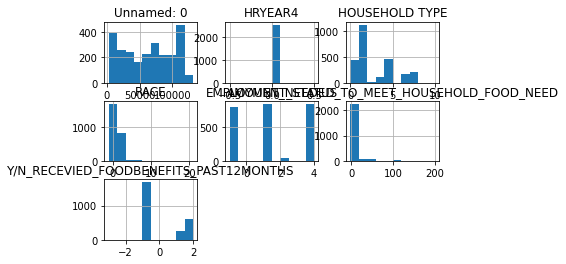